## Анализ морфологии

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

### Загрузка данных

In [2]:
data=pd.read_excel("./data/chem.xlsx", sheet_name="Среднее зн. для популяции", skiprows=2)

In [3]:
data.head()

,Sp,Region,POPUL_CODE,LAT,LON,ALT,IC,WK,CK,IOE,...,Avik,Qtr,Astr,Km-Ru,Qu,ФС,Qu-Gly,Km-Gly,Rha-Gly,Flvl
0,Df,Magadanskaya_Kam,MC1,59.31131,150.40173,301,39.305224,18.888947,-167.577204,1.202416,...,1.081305,0.182455,0.510313,0.478137,0.251770,28.336220,17.261209,1.282215,0.000000,18.883988
1,Df,Magadanskaya_Mal,MC2,60.38252,151.28287,1000,39.448805,11.136067,-198.179768,1.023259,...,2.127616,0.526859,0.914601,0.491252,0.398292,29.159362,15.084806,0.974398,8.269382,27.370029
2,Df,Yakutiya_Tim,YC3,55.95437,124.91761,507,50.137638,30.329501,-176.136634,0.960108,...,0.208790,0.814944,0.375116,0.399545,0.095348,31.322775,18.990681,1.253063,0.135304,20.474396
3,Df,Yakutiya_Ber,YC4,56.54661,124.78657,1304,46.270185,20.011514,-191.762766,1.218852,...,0.478756,0.000000,0.321789,0.321524,0.136470,30.133665,17.334634,1.413716,2.613568,21.498388
4,Df,Yakutiya_BKh,YC5,57.37098,124.91718,846,49.063621,25.091374,-188.631166,1.026335,...,1.309422,0.000000,0.302010,0.390376,0.116714,37.402236,22.150537,1.581035,2.924341,26.772627


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sp          52 non-null     object 
 1   Region      52 non-null     object 
 2   POPUL_CODE  52 non-null     object 
 3   LAT         52 non-null     float64
 4   LON         52 non-null     float64
 5   ALT         52 non-null     int64  
 6   IC          52 non-null     float64
 7   WK          52 non-null     float64
 8   CK          52 non-null     float64
 9   IOE         52 non-null     float64
 10  Ann_PREC    52 non-null     float64
 11  T           52 non-null     float64
 12  U           52 non-null     int64  
 13  R           52 non-null     int64  
 14  S           52 non-null     int64  
 15  Hy          52 non-null     float64
 16  Isqtr+Ru    52 non-null     float64
 17  El          52 non-null     float64
 18  El-gly      52 non-null     float64
 19  Avik        52 non-null     flo

Уникальность индивидуальных кодов, подсчет количества популяционных кодов

In [5]:
data.POPUL_CODE.value_counts()

KC46    1
AC32    1
BC13    1
S59     1
AC35    1
ZC20    1
AC28    1
AC42    1
KC48    1
AC31    1
S61     1
S60     1
PC49    1
AC38    1
YC9     1
AC29    1
AC30    1
ZC18    1
KC45    1
AC24    1
AC36    1
AC43    1
KC44    1
AC22    1
AC33    1
BC15    1
ZC17    1
AC27    1
IC11    1
AC39    1
AC40    1
YC3     1
AC23    1
YC6     1
ZC19    1
IC10    1
MC1     1
YC8     1
AC25    1
AC26    1
BC12    1
ZC21    1
YC4     1
AC37    1
KC47    1
YC7     1
MC2     1
AC41    1
BC14    1
AC34    1
YC5     1
S62     1
Name: POPUL_CODE, dtype: int64

Разграничение признаков по типу: морфология, климат, количественные/качетсвенные

In [24]:
climate = ['IC', 'WK', 'CK', 'IOE', 'Ann_PREC', 'T', 'U', 'R', 'S']
morph_quant = ['Hy ', 'Isqtr+Ru', 'El', 'El-gly', 'Avik', 'Qtr', 'Astr','Km-Ru ', 'Qu', 'ФС', 'Qu-Gly', 'Km-Gly', 'Rha-Gly', 'Flvl'
]  # количесвтенные хим. признаки



In [18]:
data.columns

Index(['Sp', 'Region', 'POPUL_CODE', 'LAT', 'LON', 'ALT', 'IC', 'WK', 'CK',
       'IOE', 'Ann_PREC', 'T', 'U', 'R', 'S', 'Hy ', 'Isqtr+Ru', 'El',
       'El-gly', 'Avik', 'Qtr', 'Astr', 'Km-Ru ', 'Qu', 'ФС', 'Qu-Gly',
       'Km-Gly', 'Rha-Gly', 'Flvl'],
      dtype='object')

#### Попытка прогнозировать количественные и качественные морфометрические признаки по климату

In [25]:
X = data.loc[:, climate]
X.head()
std = StandardScaler()
X = std.fit_transform(X)
lab_enc = LabelEncoder()
from collections import Counter

In [35]:
for feature in morph_quant:
    y = data.loc[:, feature].values

    
    print(f"Попытка для количественного признака {feature}:")
    clf = GradientBoostingRegressor()
    res = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
    print(res)
    print(f"Средняя точность {feature}: mse = {abs(res).mean()/y.mean()}")
    
    
    print("=" * 50)
    

Попытка для количественного признака Hy :
[-2.53157778 -3.13015397 -0.78332262 -1.04587832 -2.64344531]
Средняя точность Hy : mse = 0.9943997456438913
Попытка для количественного признака Isqtr+Ru:
[-2.2470829  -1.38531739 -2.29901937 -2.38177651 -1.07382757]
Средняя точность Isqtr+Ru: mse = 0.7854919701783016
Попытка для количественного признака El:
[ -7.87396524  -9.66029049 -14.52984537  -6.56755902  -6.31230286]
Средняя точность El: mse = 2.9967512721157865
Попытка для количественного признака El-gly:
[-42.36322243 -14.71617948 -24.27549684 -17.96907744 -13.70132844]
Средняя точность El-gly: mse = 2.5596247661447857
Попытка для количественного признака Avik:
[-0.33004417 -0.7178843  -1.05300034 -2.31617381 -0.98986668]
Средняя точность Avik: mse = 0.7079065788098651
Попытка для количественного признака Qtr:
[-0.17079625 -0.01291975 -0.03912552 -0.0073977  -0.35855428]
Средняя точность Qtr: mse = 0.8906150962011595
Попытка для количественного признака Astr:
[-0.03616312 -0.0276838  

## Cluster analysis

In [45]:
varX = data.loc[:,morph_quant]
varX.index=data.POPUL_CODE

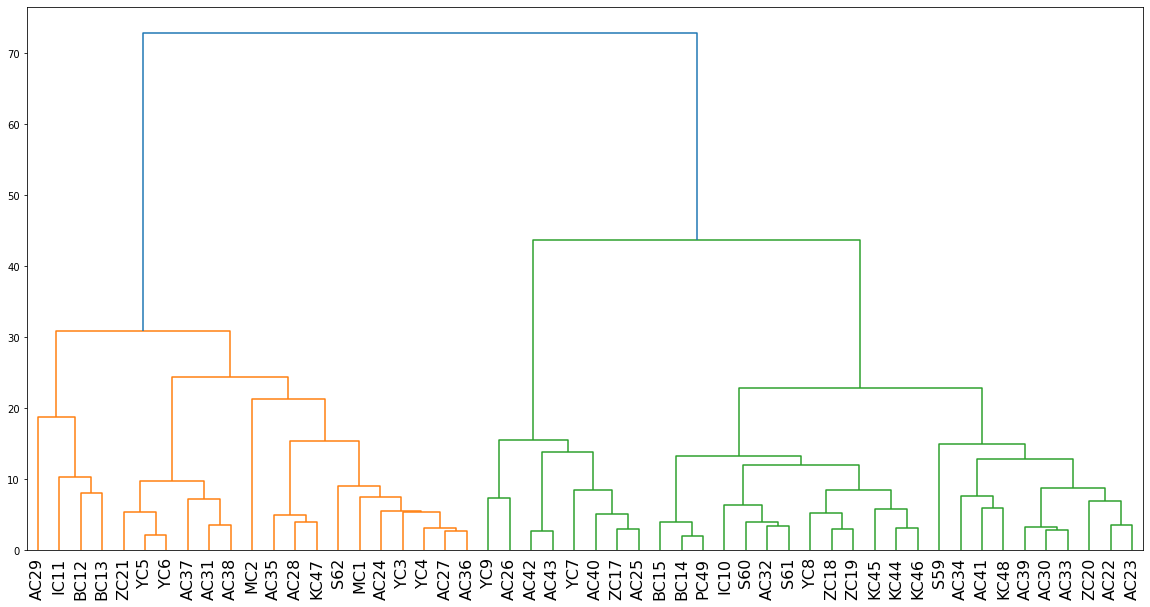

In [46]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

ydists = pdist(varX)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=varX.index, ax=ax, leaf_font_size=16)

In [41]:
clusters = hierarchy.fcluster(Z, 25, criterion='distance')

### Визуализация при помощи PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)

In [44]:
climate

['IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC', 'T', 'U', 'R', 'S']

In [45]:
grp = data.groupby('POPUL_CODE')[climate].apply(lambda x: x.mean())


In [46]:
pca_x = pca.fit_transform(std.fit_transform(grp.values))

cl=1, ['AC23', 'AC32', 'AC34', 'AC36', 'AC37', 'AC38', 'AC39', 'BC14', 'JC43', 'KC44', 'KC47', 'KC63', 'SC59', 'YC5', 'YC9']
cl=2, ['JC42', 'ZC17']
cl=3, ['AC24', 'AC25', 'AC27', 'AC31', 'PC49', 'SC60', 'YC7']
cl=4, ['KC64', 'MC2', 'SC61']
cl=5, ['AC22', 'AC40']
cl=6, ['AC28', 'BC12', 'SC62', 'YC6', 'YC8', 'ZC18', 'ZC19']
cl=7, ['AC29', 'AC30', 'AC33', 'BC13', 'IC10', 'IC11', 'KC45', 'YC3']
cl=8, ['AC26', 'AC35', 'BC15', 'KC46', 'YC4', 'ZC20', 'ZC21']
cl=9, ['AC41']


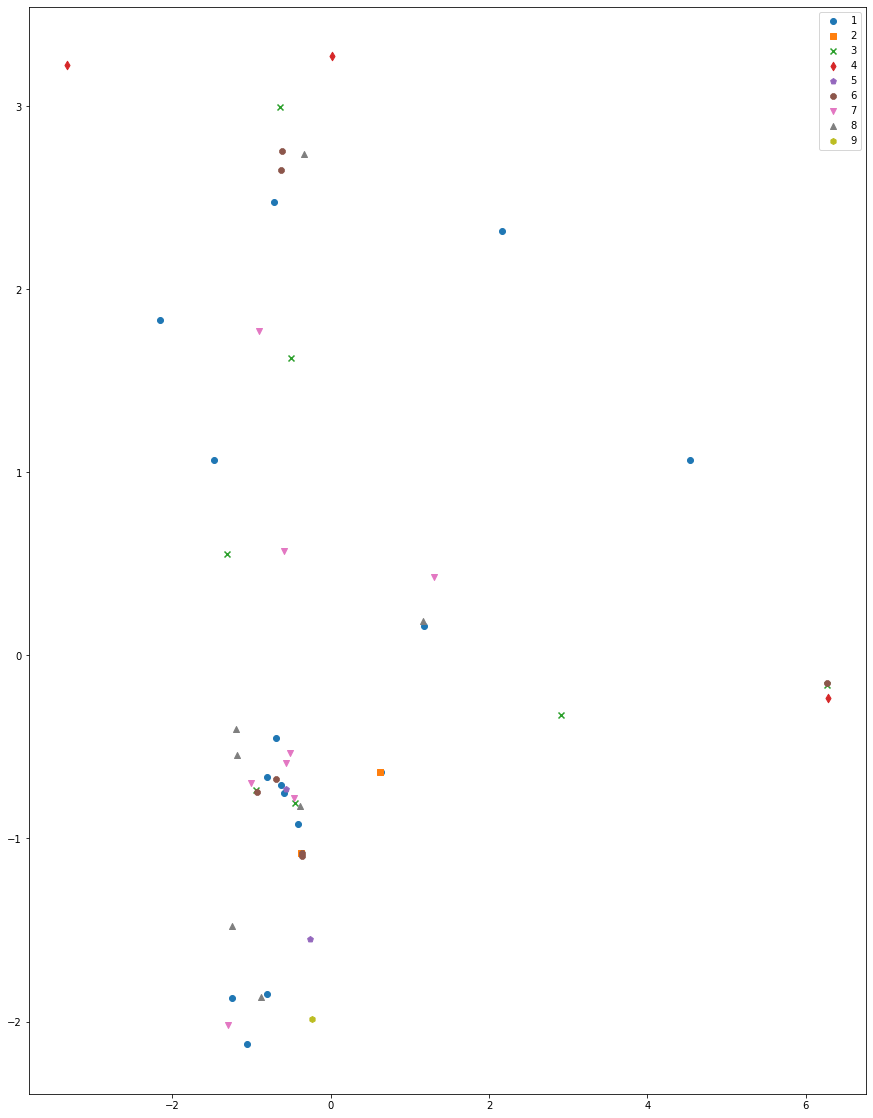

In [47]:
fig=plt.figure(figsize=(15, 20))
for cl, m in zip(np.unique(clusters), 'osxdp8v^h'):
    plt.scatter(pca_x[cl==clusters,0], pca_x[cl==clusters,1], label=cl, marker=m)
    print(f"cl={cl}, {grp.index[cl==clusters].tolist()}")
plt.legend()

In [48]:

within = []
means = []
for cl in np.unique(clusters):
    if cl != 9:
        between=grp.values[cl==clusters].var(axis=0)
        within = []
        for popul in grp.index[cl==clusters].tolist():
            within.append(grp.loc[popul].var())
        within = np.array(within).sum(axis=0)
        ratio=between/within
        print(f"\nCluster: {cl}: {grp.index[cl==clusters].tolist()}")
        arat = np.argsort(-between/within)
        for n, val in zip(np.array(climate)[arat], ratio[arat]):
            print(f"{n: <10}{val:.4}")


Cluster: 1: ['AC23', 'AC32', 'AC34', 'AC36', 'AC37', 'AC38', 'AC39', 'BC14', 'JC43', 'KC44', 'KC47', 'KC63', 'SC59', 'YC5', 'YC9']
T         0.01161
Ann_PREC  0.005151
S         0.004835
R         0.004555
PN        0.0005788
CK        8.326e-05
WK        7.562e-06
U         2.389e-06
IC        1.963e-06
IOE       7.768e-08

Cluster: 2: ['JC42', 'ZC17']
T         0.05699
R         0.01579
S         0.01288
Ann_PREC  0.006913
PN        0.000172
CK        7.099e-05
WK        1.95e-05
IC        1.404e-05
IOE       2.229e-07
U         1.643e-07

Cluster: 3: ['AC24', 'AC25', 'AC27', 'AC31', 'PC49', 'SC60', 'YC7']
T         0.0358
S         0.02184
Ann_PREC  0.01537
R         0.0109
PN        0.0007719
CK        0.00055
WK        2.421e-05
IC        1.187e-05
U         8.723e-06
IOE       1.78e-07

Cluster: 4: ['KC64', 'MC2', 'SC61']
Ann_PREC  0.07338
T         0.04459
R         0.01912
S         0.018
PN        0.01398
CK        0.004409
WK        0.0005786
IC        9.362e-05
U         4.

In [49]:
ratio=between/within
argratio = np.argsort(-between/within)
for n, val in zip(np.array(climate)[argratio], ratio[argratio]):
    print(n, val)

T 0.01997149192572159
R 0.00681593017593877
S 0.0061971406461399405
Ann_PREC 0.002363908848947187
PN 0.00033877853096554673
CK 0.00012038085882613199
U 7.363838703241639e-06
WK 7.29703310465231e-06
IC 2.213531716367621e-06
IOE 7.20285118498616e-08


In [50]:
grp.describe()

,IC,PN,WK,CK,IOE,Ann_PREC,T,U,R,S
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,42.852752,89.499203,34.124877,-137.817210,1.069680,511.306364,1794.292308,71.384615,383.634615,2208.634615
std,6.005538,67.222714,11.604074,38.875349,0.791515,211.420792,409.938533,6.371363,227.592690,263.561879
min,26.265747,-137.972638,-8.769984,-225.588563,0.018813,186.009147,997.600000,58.000000,73.000000,1606.000000
25%,40.654546,58.724413,30.178927,-143.930858,0.623484,376.688299,1586.225000,66.000000,122.000000,1983.000000
50%,43.434320,78.682179,35.999136,-134.201815,0.870438,430.709590,1829.600000,72.000000,426.000000,2249.000000
75%,46.411981,129.481920,38.690385,-126.456005,1.168892,602.044667,2005.125000,74.250000,521.000000,2418.000000
max,55.545315,233.950513,55.132124,-30.838068,3.632345,1150.679022,2668.800000,88.000000,860.000000,2580.000000


### Кластерный анализ по морфологическим признакам

In [51]:
data.head()

,Sp,Region,PLANT_CODE,POPUL_CODE,LAT,LON,ALT,IC,PN,WK,...,Dpl/Lp,Ср.зн S2p3l-S2p4l,Dp,Dvl,Dnl,Dc,Dvns,Dnns,Dvvs,Dnvs
0,Df,Magadanskaya_Mal,A1,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.356234,0.40,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
1,Df,Magadanskaya_Mal,A2,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.275556,0.24,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
2,Df,Magadanskaya_Mal,A3,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.273902,0.34,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
3,Df,Magadanskaya_Mal,A4,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.355114,0.35,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3
4,Df,Magadanskaya_Mal,A5,MC2,60.38252,151.28287,1000,39.448826,157.45163,11.136081,...,0.316384,0.43,0.3,0.3,0.3,0.3,0.3,0.3,0.1,0.3


### Кластеризация по количественным и качественным признакам

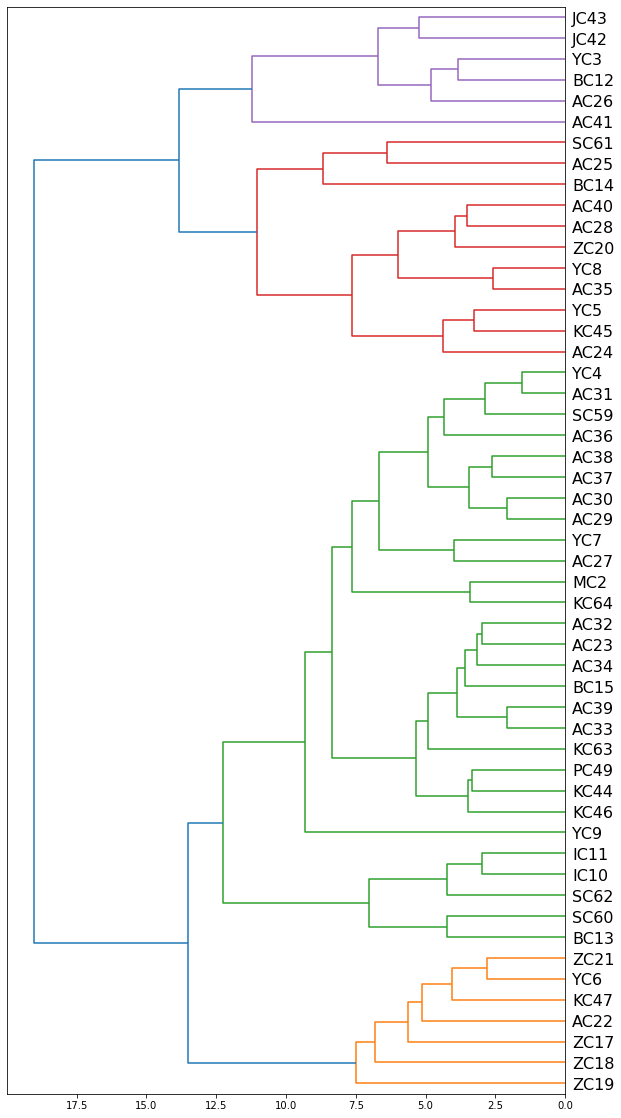

In [52]:
X_data = data.groupby('POPUL_CODE')[morph_qual + morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
ydists = pdist(X_data_)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=X_data.index, ax=ax, leaf_font_size=16, orientation='left')
clusters_all = hierarchy.fcluster(Z, 10, criterion='distance')

#### Кластеризация по качественным признакам

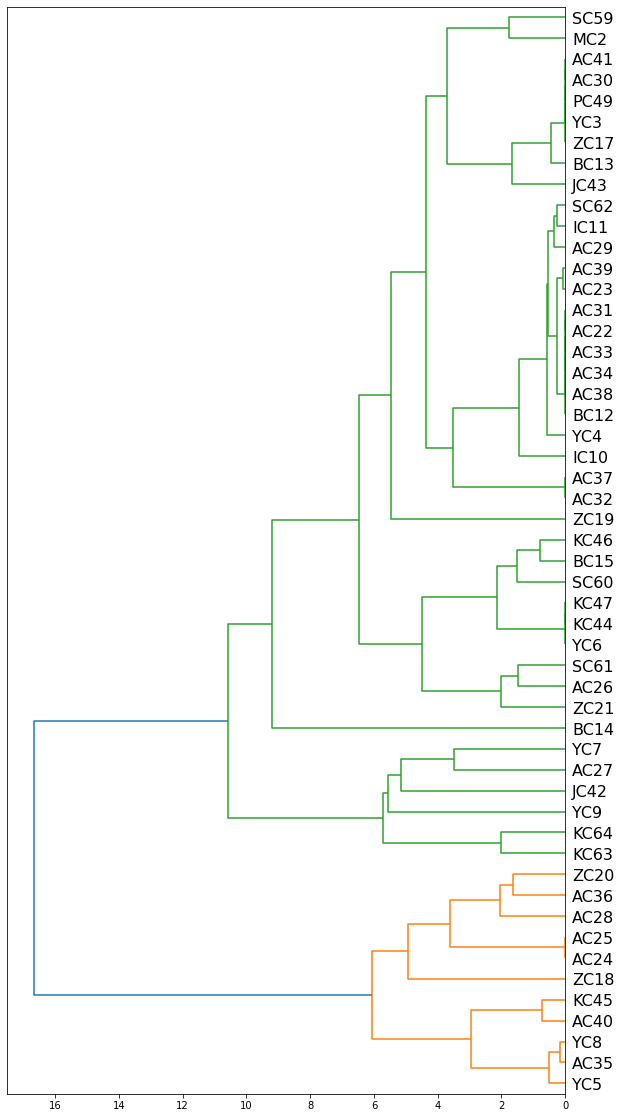

In [53]:
X_data = data.groupby('POPUL_CODE')[morph_qual].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
ydists = pdist(X_data_)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=X_data.index, ax=ax, leaf_font_size=16, orientation='left')
clusters_qual = hierarchy.fcluster(Z, 10, criterion='distance')

# Кластеризация по количественным признакам

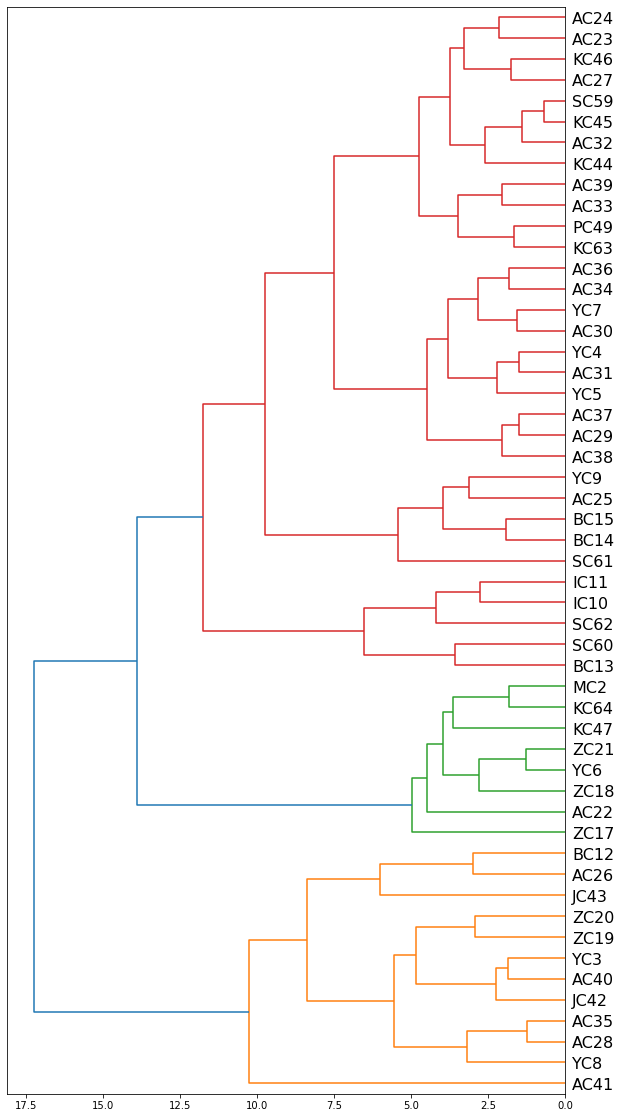

In [54]:
X_data = data.groupby('POPUL_CODE')[morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
ydists = pdist(X_data_)
Z = hierarchy.linkage(ydists, 'ward')
fig=plt.figure(figsize=(10,20))
ax = fig.add_subplot(111)
dn = hierarchy.dendrogram(Z, labels=X_data.index, ax=ax, leaf_font_size=16, orientation='left')
clusters_quant = hierarchy.fcluster(Z, 10, criterion='distance')

In [55]:
from sklearn.metrics import adjusted_rand_score

##### Попарные сравнения классификаций при помощи индекса Рэнда:

In [56]:
adjusted_rand_score(clusters_quant, clusters_qual)


-0.026126857072728424

In [57]:
adjusted_rand_score(clusters_all, clusters_qual)

0.12954377676066733

In [58]:
adjusted_rand_score(clusters_all, clusters_quant)

0.5556385362210605

Тут в общем должно быть понятно, что _all это все признаки, ну и так далее, qual -- это качественные, quant -- это количественные. Чем больше индекс Рэнда, тем более похожи результаты кластеризаций.

In [59]:
from yellowbrick.features.radviz import radviz

In [60]:
X_data.shape

(52, 14)

In [61]:
X_data_.shape

(52, 14)

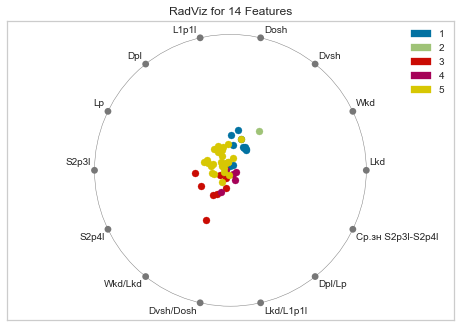

RadialVisualizer(ax=<AxesSubplot:title={'center':'RadViz for 14 Features'}>)

In [62]:
X_data = data.groupby('POPUL_CODE')[morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
radviz(X_data, clusters_quant)

In [63]:
for i in np.unique(clusters_quant):
    print(f"{i}-cluster: {X_data.index[clusters_quant==i]}")

1-cluster: Index(['AC26', 'AC28', 'AC35', 'AC40', 'BC12', 'JC42', 'JC43', 'YC3', 'YC8',
       'ZC19', 'ZC20'],
      dtype='object', name='POPUL_CODE')
2-cluster: Index(['AC41'], dtype='object', name='POPUL_CODE')
3-cluster: Index(['AC22', 'KC47', 'KC64', 'MC2', 'YC6', 'ZC17', 'ZC18', 'ZC21'], dtype='object', name='POPUL_CODE')
4-cluster: Index(['BC13', 'IC10', 'IC11', 'SC60', 'SC62'], dtype='object', name='POPUL_CODE')
5-cluster: Index(['AC23', 'AC24', 'AC25', 'AC27', 'AC29', 'AC30', 'AC31', 'AC32', 'AC33',
       'AC34', 'AC36', 'AC37', 'AC38', 'AC39', 'BC14', 'BC15', 'KC44', 'KC45',
       'KC46', 'KC63', 'PC49', 'SC59', 'SC61', 'YC4', 'YC5', 'YC7', 'YC9'],
      dtype='object', name='POPUL_CODE')


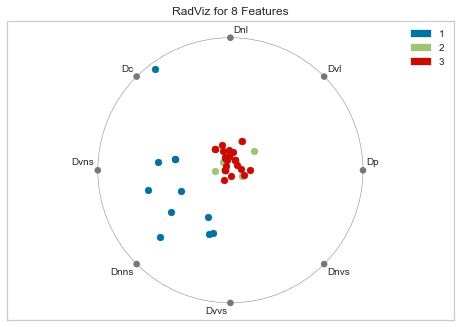

RadialVisualizer(ax=<AxesSubplot:title={'center':'RadViz for 8 Features'}>)

In [64]:
X_data = data.groupby('POPUL_CODE')[morph_qual].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
radviz(X_data, clusters_qual)

In [65]:
for i in np.unique(clusters_qual):
    print(f"{i}-cluster: {X_data.index[clusters_qual==i]}")

1-cluster: Index(['AC24', 'AC25', 'AC28', 'AC35', 'AC36', 'AC40', 'KC45', 'YC5', 'YC8',
       'ZC18', 'ZC20'],
      dtype='object', name='POPUL_CODE')
2-cluster: Index(['AC27', 'JC42', 'KC63', 'KC64', 'YC7', 'YC9'], dtype='object', name='POPUL_CODE')
3-cluster: Index(['AC22', 'AC23', 'AC26', 'AC29', 'AC30', 'AC31', 'AC32', 'AC33', 'AC34',
       'AC37', 'AC38', 'AC39', 'AC41', 'BC12', 'BC13', 'BC14', 'BC15', 'IC10',
       'IC11', 'JC43', 'KC44', 'KC46', 'KC47', 'MC2', 'PC49', 'SC59', 'SC60',
       'SC61', 'SC62', 'YC3', 'YC4', 'YC6', 'ZC17', 'ZC19', 'ZC21'],
      dtype='object', name='POPUL_CODE')


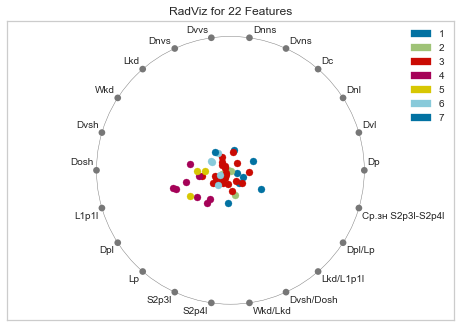

RadialVisualizer(ax=<AxesSubplot:title={'center':'RadViz for 22 Features'}>)

In [66]:
X_data = data.groupby('POPUL_CODE')[morph_qual+morph_quant].mean()
std = StandardScaler()
X_data_ = std.fit_transform(X_data)
radviz(X_data, clusters_all)

In [67]:
for i in np.unique(clusters_all):
    print(f"{i}-cluster: {X_data.index[clusters_all==i]}")

1-cluster: Index(['AC22', 'KC47', 'YC6', 'ZC17', 'ZC18', 'ZC19', 'ZC21'], dtype='object', name='POPUL_CODE')
2-cluster: Index(['BC13', 'IC10', 'IC11', 'SC60', 'SC62'], dtype='object', name='POPUL_CODE')
3-cluster: Index(['AC23', 'AC27', 'AC29', 'AC30', 'AC31', 'AC32', 'AC33', 'AC34', 'AC36',
       'AC37', 'AC38', 'AC39', 'BC15', 'KC44', 'KC46', 'KC63', 'KC64', 'MC2',
       'PC49', 'SC59', 'YC4', 'YC7', 'YC9'],
      dtype='object', name='POPUL_CODE')
4-cluster: Index(['AC24', 'AC28', 'AC35', 'AC40', 'KC45', 'YC5', 'YC8', 'ZC20'], dtype='object', name='POPUL_CODE')
5-cluster: Index(['AC25', 'BC14', 'SC61'], dtype='object', name='POPUL_CODE')
6-cluster: Index(['AC26', 'BC12', 'JC42', 'JC43', 'YC3'], dtype='object', name='POPUL_CODE')
7-cluster: Index(['AC41'], dtype='object', name='POPUL_CODE')


### PCA по количественным и качественным признакам для групп

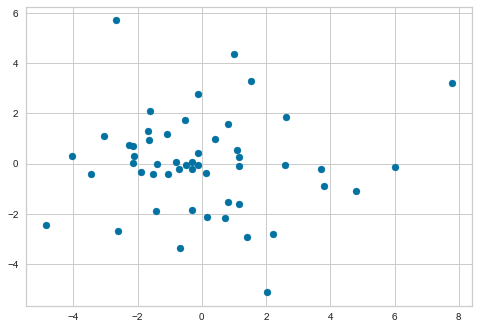

In [68]:
std = StandardScaler()
df = data.groupby('POPUL_CODE')[morph_qual+morph_quant].mean()
X_data = std.fit_transform(df)
pca = PCA(n_components=2)
pca.fit(X_data)
X_trans = pca.transform(X_data)
plt.scatter(X_trans[:,0], X_trans[:, 1])

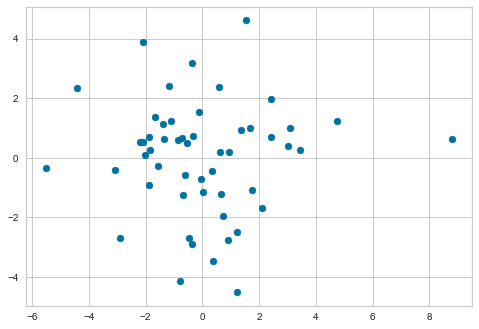

In [69]:
std = StandardScaler()
df = data.groupby('POPUL_CODE')[morph_quant].mean()
X_data = std.fit_transform(df)
pca = PCA(n_components=2)
pca.fit(X_data)
X_trans = pca.transform(X_data)
plt.scatter(X_trans[:,0], X_trans[:, 1])

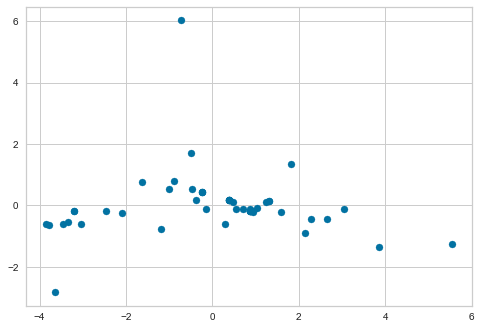

In [70]:
std = StandardScaler()
df = data.groupby('POPUL_CODE')[morph_qual].mean()
X_data = std.fit_transform(df)
pca = PCA(n_components=2)
pca.fit(X_data)
X_trans = pca.transform(X_data)
plt.scatter(X_trans[:,0], X_trans[:, 1])

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.lines import Line2D

In [72]:
%matplotlib notebook

<IPython.core.display.Javascript object>


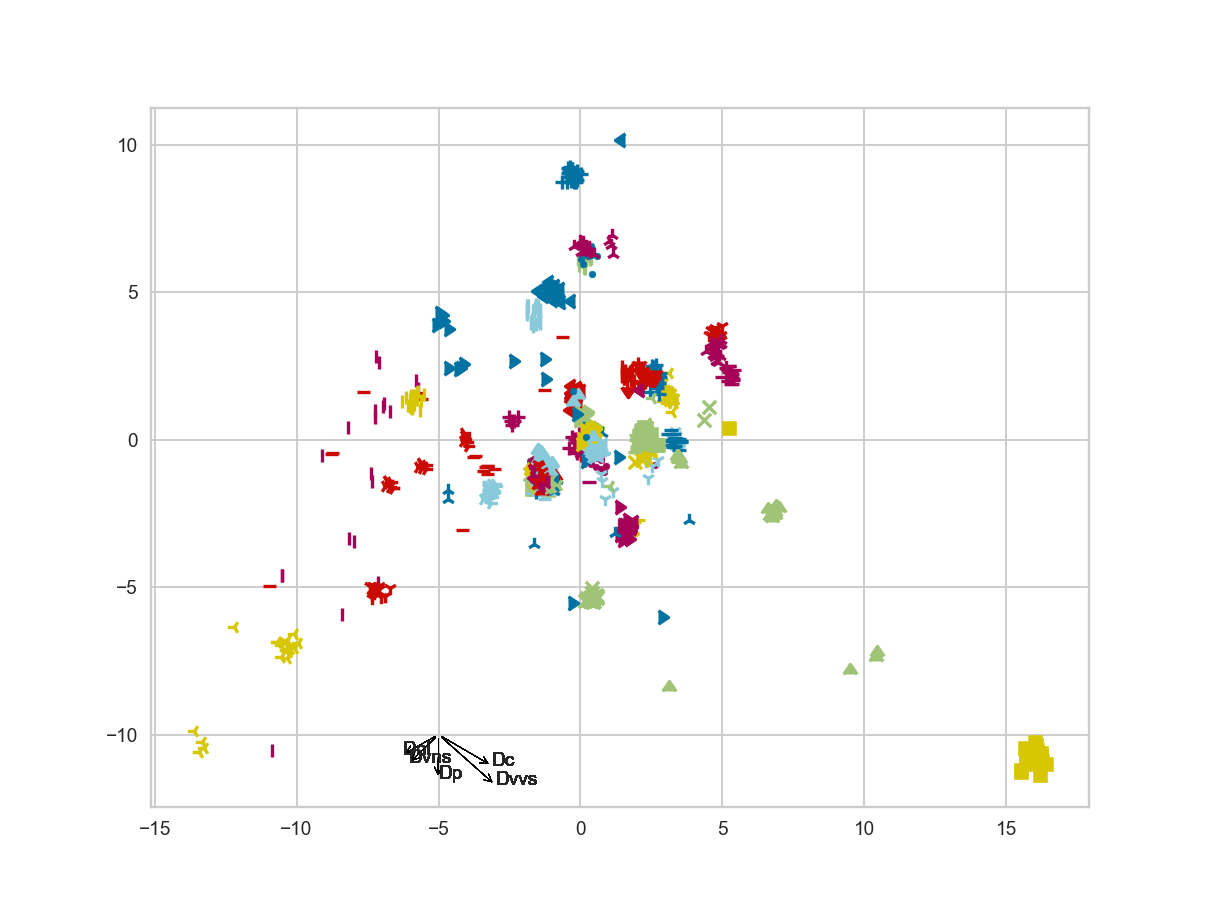

In [73]:
std = StandardScaler()
df = data.loc[:, morph_qual+morph_quant+['POPUL_CODE']].copy()
X_data = std.fit_transform(df.loc[:, morph_qual + morph_quant])
lda = LinearDiscriminantAnalysis(n_components=2)

la = LabelEncoder()
la.fit(df.POPUL_CODE)
lda.fit(X_data, la.transform(df.POPUL_CODE))
X_trans = lda.transform(X_data)


unfilled_markers = [m for m, func in Line2D.markers.items() if func != 'nothing' and m not in Line2D.filled_markers]


e = np.zeros((1, X_data.shape[1]))
arrows = []
for k in range(X_data.shape[1]):
    ek = e.copy()
    ek[0, k] = 1.0
    (dx, dy) = lda.transform(ek)[0]
    arrows.append([dx**2 + dy**2, k])
    
arrows = sorted(arrows, key=lambda x: x[0], reverse=True)


for ind, cl in enumerate(np.unique(df.POPUL_CODE)):
    x1, x2 = X_trans[df.POPUL_CODE==cl,0], X_trans[df.POPUL_CODE==cl, 1]
    plt.scatter(x1, x2, marker=unfilled_markers[ind % 21], label=cl)

    for k in map(lambda x: x[1], arrows[:5]):
        ek = e.copy()
        ek[0, k] = 1.0
        dx, dy = lda.transform(ek)[0]
        plt.gca().annotate("",
                xy=(dx-5, dy-10), xycoords='data',
                xytext=(-5, -10.0), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
            )
        plt.gca().annotate(f"{(morph_qual + morph_quant)[k]}",
                xy=(dx-5, dy-10), xycoords='data')
plt.legend()

In [74]:
def combine_popluations(population_code):
    if population_code == 'MC2':
        return "MG"  # Магаданская
    elif population_code in [f"YC{_}" for _ in range(3, 10)]:
        return "YA"  # Якутская
    elif population_code in ["IC10", "IC11"]:
        return "IR"  # Иркутская
    elif population_code in [f"BC{_}" for _ in range(12, 16)]:
        return "BU"  # Бурятская
    elif population_code in [f"ZC{_}" for _ in range(17, 22)]:
        return "ZB"  # Забайкальская
    elif population_code in [f"AC{_}" for _ in range(22, 42)]:
        return "AM"  # Амурская
    elif population_code in ["JC42", "JC43"]:
        return "EV"  # Еврейская
    elif population_code in [f"KC{_}" for _ in range(44, 48)]:
        return "KH"  # Хабаровская
    elif population_code=="PC49":
        return "PR"  # Приморская
    elif population_code in [f"SC{_}" for _ in range(59, 63)]:
        return "SA"  # Сахалинская
    else:
        return "KA"  # Камчатская 

In [75]:
df_old = df.copy()




In [98]:
df=df_old.copy()
df.POPUL_CODE = df.POPUL_CODE.map(combine_popluations)


In [99]:
Counter(df.POPUL_CODE)

Counter({'MG': 20,
         'YA': 140,
         'IR': 40,
         'BU': 80,
         'ZB': 100,
         'AM': 400,
         'EV': 40,
         'KH': 80,
         'PR': 20,
         'SA': 80,
         'KA': 40})

In [103]:
%matplotlib notebook

<IPython.core.display.Javascript object>


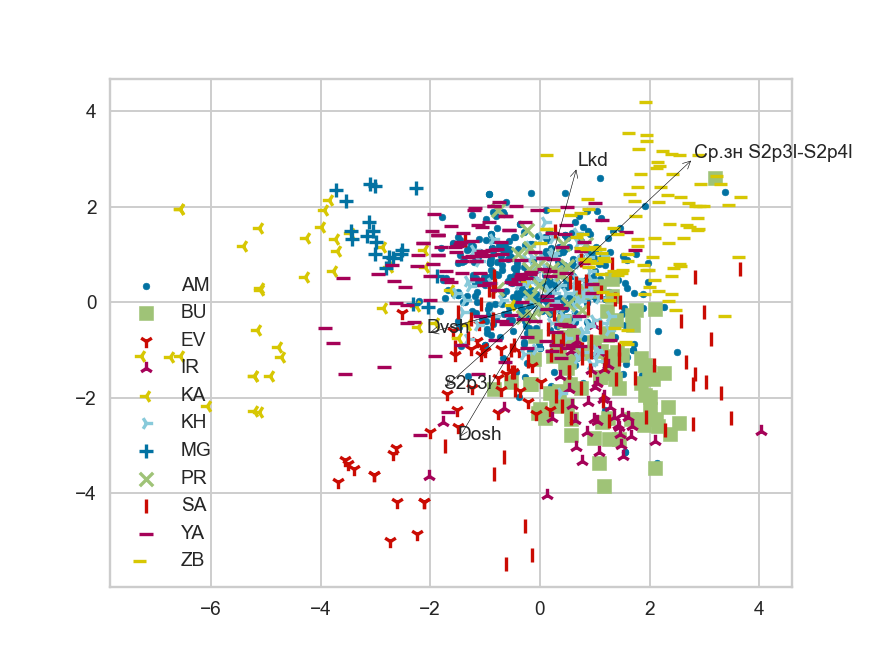

In [104]:
std = StandardScaler()
#df = data.loc[:, morph_qual+morph_quant+['POPUL_CODE']].copy()
X_data = std.fit_transform(df.loc[:, morph_qual + morph_quant])
lda = LinearDiscriminantAnalysis(n_components=2)

la = LabelEncoder()
la.fit(df.POPUL_CODE)
lda.fit(X_data, la.transform(df.POPUL_CODE))
X_trans = lda.transform(X_data)


unfilled_markers = [m for m, func in Line2D.markers.items() if func != 'nothing' and m not in Line2D.filled_markers]


e = np.zeros((1, X_data.shape[1]))
arrows = []
for k in range(X_data.shape[1]):
    ek = e.copy()
    ek[0, k] = 1.0
    (dx, dy) = lda.transform(ek)[0]
    arrows.append([dx**2 + dy**2, k])
    
arrows = sorted(arrows, key=lambda x: x[0], reverse=True)


for ind, cl in enumerate(np.unique(df.POPUL_CODE)):
    x1, x2 = X_trans[df.POPUL_CODE==cl,0], X_trans[df.POPUL_CODE==cl, 1]
    plt.scatter(x1, x2, marker=unfilled_markers[ind % 21], label=cl)

for k in map(lambda x: x[1], arrows[:5]):
    ek = e.copy()
    ek[0, k] = 1.0
    dx, dy = lda.transform(ek)[0]
    plt.gca().annotate("",
            xy=(dx, dy), xycoords='data',
            xytext=(0, 0.0), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
        )
    plt.gca().annotate(f"{(morph_qual + morph_quant)[k]}",
            xy=(dx, dy), xycoords='data')
plt.legend()


In [105]:
plt.show()

In [96]:
lda.explained_variance_ratio_

array([0.2905698 , 0.18654058])

In [106]:
plt.gcf().savefig("output.png", dpi=600)